In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [ ]:
courses = pd.read_csv("/content/drive/MyDrive/oulad/courses.csv")
assessments = pd.read_csv("/content/drive/MyDrive/oulad/assessments.csv")
vle = pd.read_csv("/content/drive/MyDrive/oulad/vle.csv")
student_info = pd.read_csv("/content/drive/MyDrive/oulad/studentInfo.csv")
student_registration = pd.read_csv("/content/drive/MyDrive/oulad/studentRegistration.csv")
student_assessment = pd.read_csv("/content/drive/MyDrive/oulad/studentAssessment.csv")
student_vle = pd.read_csv("/content/drive/MyDrive/oulad/studentVle.csv")

In [ ]:
# List of DataFrames (tables)
tables = [courses, assessments, vle, student_info, student_registration, student_assessment, student_vle]
table_names = ["courses", "assessments", "vle", "student_info", "student_registration", "student_assessment", "student_vle"]

# Initialize an empty list to store the summary data
summary_data = []

# Iterate over tables to extract the desired information
for table, table_name in zip(tables, table_names):
    # Number of rows and columns
    rows, columns = table.shape

    # Count of missing rows (rows with at least one missing value)
    missing_rows = table.isnull().any(axis=1).sum()

    # Count of missing columns (columns with at least one missing value)
    missing_columns = table.isnull().any(axis=0).sum()

    # Column names
    column_names = ", ".join(table.columns)

    # Append the information for this table to the summary data list
    summary_data.append({
        "Table Name": table_name,
        "Rows, Columns": f"{rows}, {columns}",
        "Missing Rows": missing_rows,
        "Missing Columns": missing_columns,
        "Column Names": column_names
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
display(summary_df)

,Table Name,"Rows, Columns",Missing Rows,Missing Columns,Column Names
0,courses,"22, 3",0,0,"code_module, code_presentation, module_present..."
1,assessments,"206, 6",11,1,"code_module, code_presentation, id_assessment,..."
2,vle,"6364, 6",5243,2,"id_site, code_module, code_presentation, activ..."
3,student_info,"32593, 12",1111,1,"code_module, code_presentation, id_student, ge..."
4,student_registration,"32593, 5",22560,2,"code_module, code_presentation, id_student, da..."
5,student_assessment,"173912, 5",173,1,"id_assessment, id_student, date_submitted, is_..."
6,student_vle,"10655280, 6",0,0,"code_module, code_presentation, id_student, id..."


In [ ]:
# Check the structure of each DataFrame
print("Courses Dataframe Info\n")
display(courses.info())
display(courses)
display(courses.describe())

print("\nAssessments Dataframe Info\n")
display(assessments.info())
display(assessments)
display(assessments.describe())

print("\nVLE Dataframe Info\n")
display(vle.info())
display(vle)
display(vle.describe())

print("\nStudent Info Dataframe Info\n")
display(student_info.info())
display(student_info)
display(student_info.describe())

print("\nStudent Registration Dataframe Info\n")
display(student_registration.info())
display(student_registration)
display(student_registration.describe())

print("\nStudent Assessment Dataframe Info\n")
display(student_assessment.info())
display(student_assessment.head())
display(student_assessment.describe())

print("\nStudent VLE Dataframe Info\n")
display(student_vle.info())
display(student_vle.head())
display(student_vle.describe())

Courses Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


None

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000



Assessments Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


None

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000



VLE Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


None

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000



Student Info Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


None

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000



Student Registration Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


None

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000



Student Assessment Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


None

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000



Student VLE Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


None

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [ ]:
# Filter the student_info DataFrame for the "DDDD" module and "2013J" or "2014J" presentation
dddj_student_info = student_info[((student_info["code_module"] == "DDD") & (student_info["code_presentation"]=="2013J")) |
                                ((student_info["code_module"] == "DDD") & (student_info["code_presentation"]=="2014J"))].drop("code_module", axis=1)

# Display the new DataFrame
display(dddj_student_info)

# Check the shape of the new DataFrame
display(f"Rows: {dddj_student_info.shape[0]}, Columns: {dddj_student_info.shape[1]}")


,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14394,2013J,3733,M,South Region,HE Qualification,90-100%,55<=,0,60,N,Withdrawn
14395,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
14396,2013J,27417,M,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Withdrawn
14397,2013J,27935,F,East Anglian Region,Lower Than A Level,30-40%,0-35,0,60,Y,Fail
14398,2013J,28046,F,Yorkshire Region,HE Qualification,10-20,35-55,0,70,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...
19358,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass
19359,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass
19360,2014J,2689863,F,South West Region,A Level or Equivalent,30-40%,0-35,1,120,N,Pass
19361,2014J,2698109,M,East Anglian Region,Lower Than A Level,70-80%,0-35,0,60,Y,Withdrawn


'Rows: 3741, Columns: 11'

**DDD Module Student Attribute Distribution From Student_Info Table**

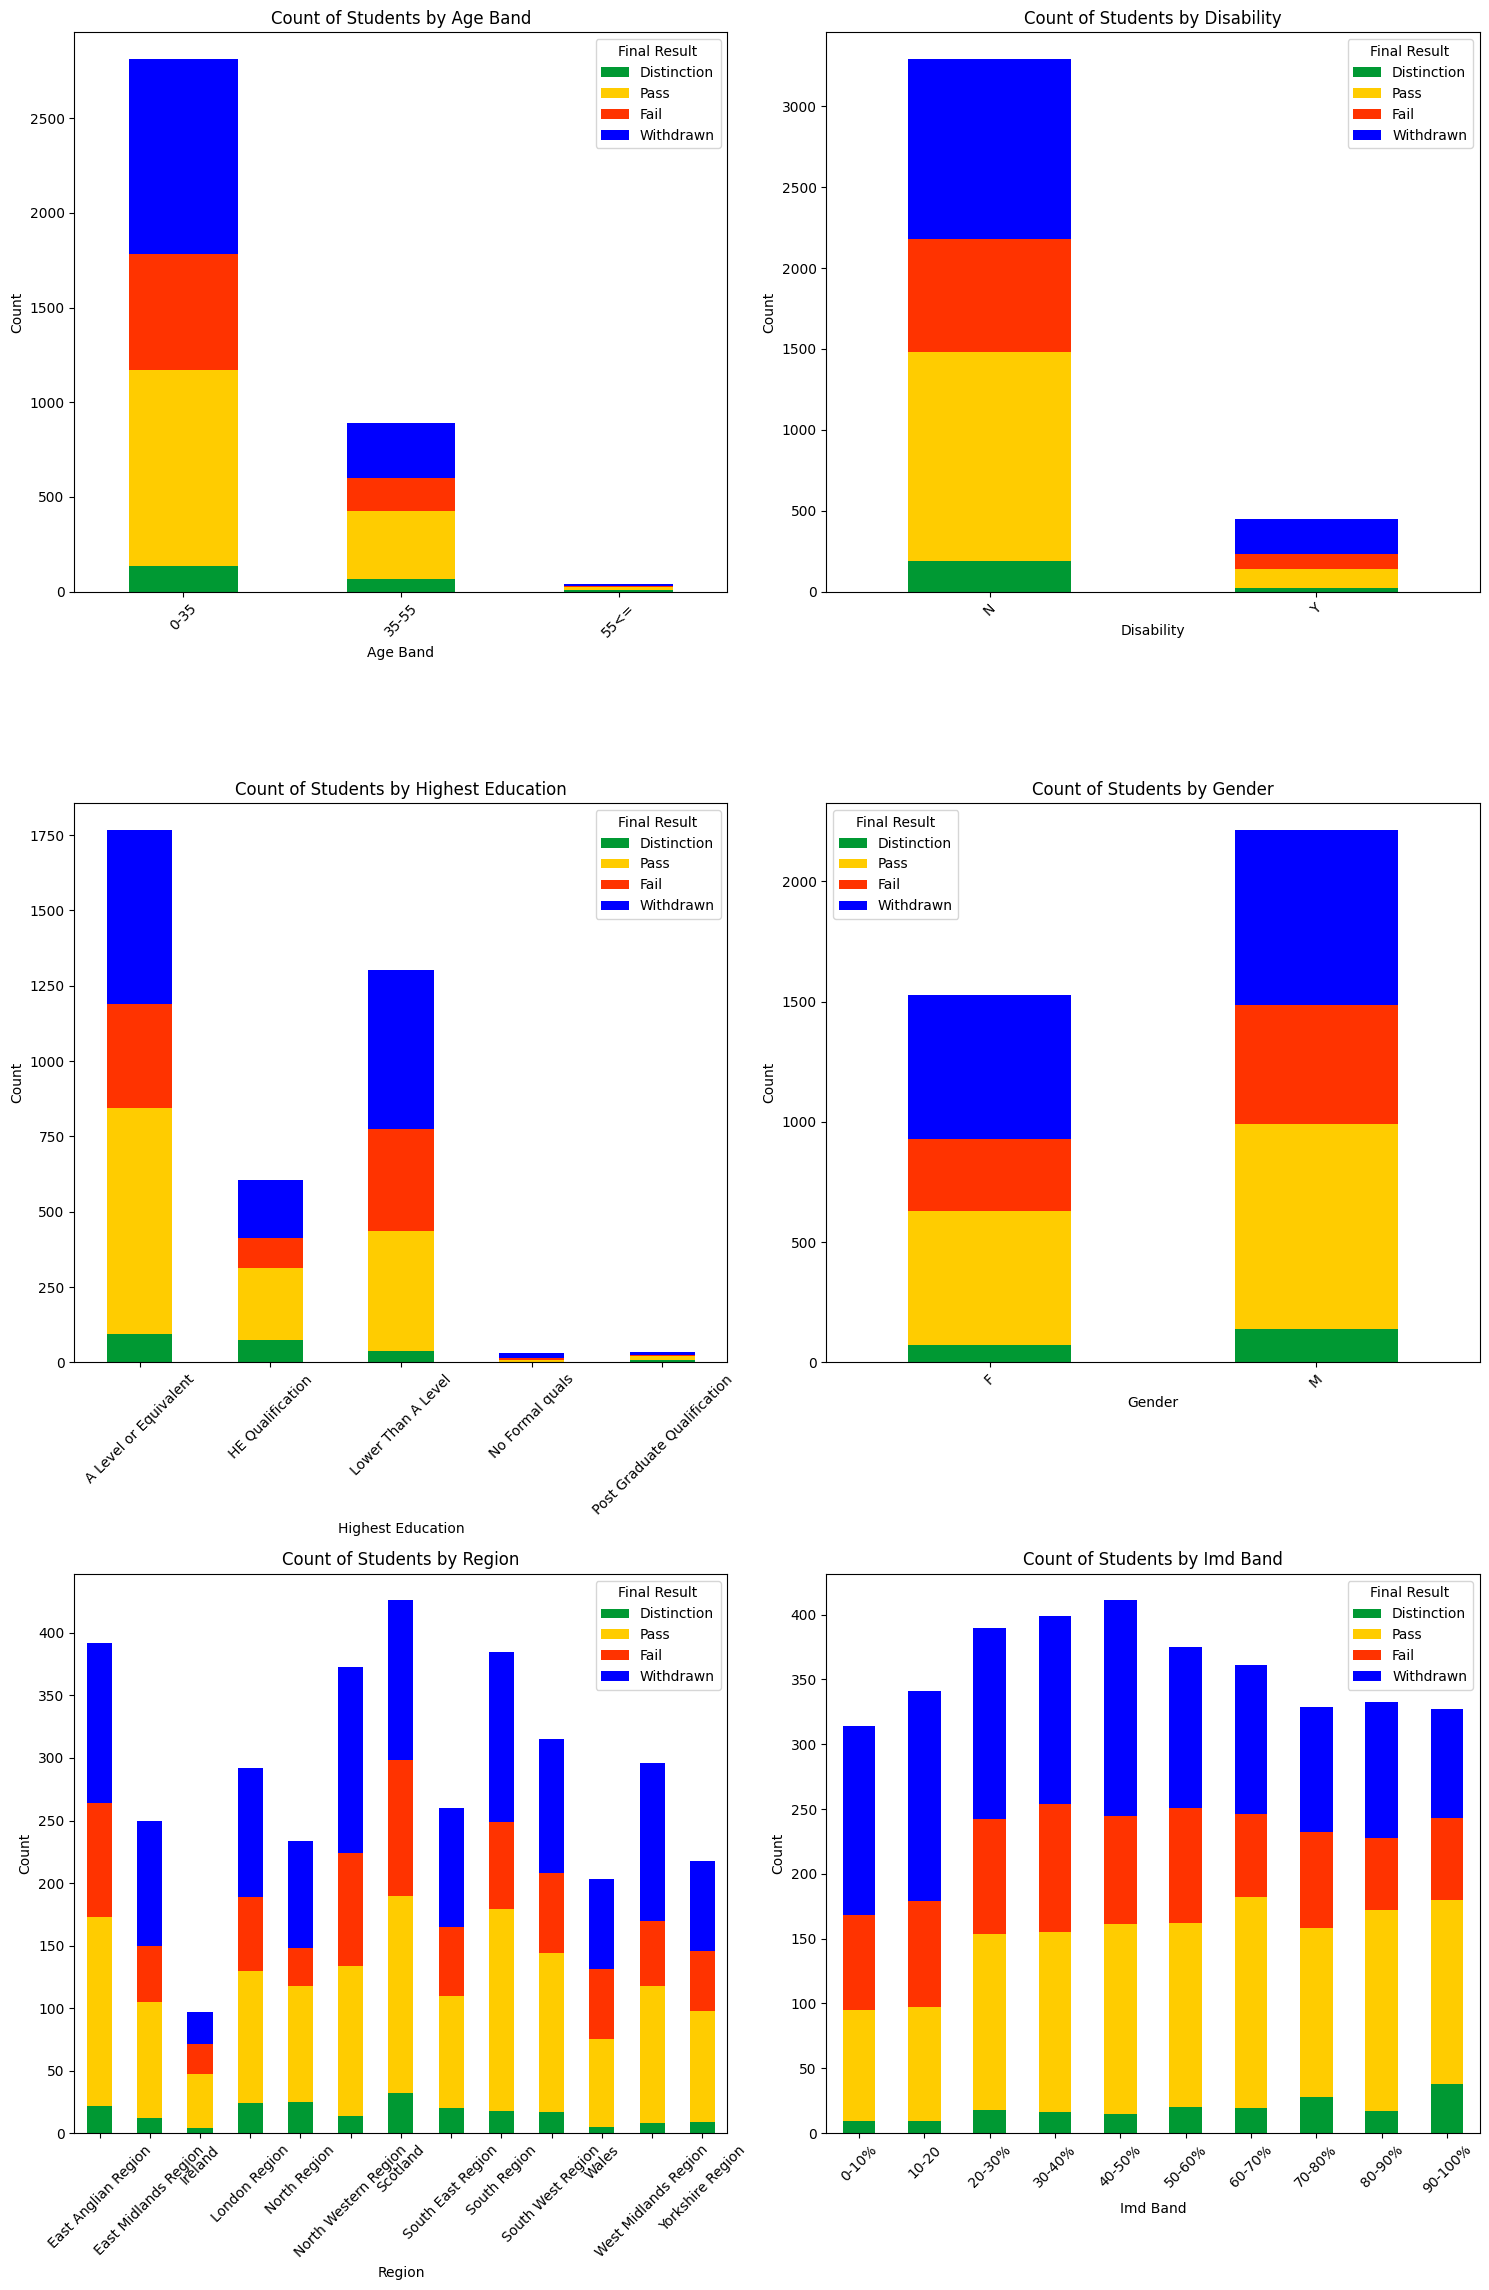

In [ ]:

# Ensure "final_result" is a categorical column with the desired order
final_result_order = ["Distinction", "Pass", "Fail", "Withdrawn"]
dddj_student_info["final_result"] = pd.Categorical(dddj_student_info["final_result"], categories=final_result_order, ordered=True)

# Define the columns to plot
columns_to_plot = ["age_band", "disability", "highest_education", "gender", "region", "imd_band"]

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(15, 23))

# Colors for the bars
colors = ["#009933", "#ffcc00", "#ff3300", "#0000ff"]

# Loop through the columns and plot each one
for ax, column in zip(axes.flatten(), columns_to_plot):
    grouped_data = dddj_student_info.groupby([column, "final_result"], observed=False).size().unstack()
    grouped_data = grouped_data.reindex(columns=final_result_order, fill_value=0)  # Ensure all categories are present
    grouped_data.plot(kind="bar", stacked=True, ax=ax, color=colors)

    # Customize each subplot
    ax.set_title(f"Count of Students by {column.replace('_', ' ').title()}")
    ax.set_xlabel(column.replace("_", " ").title())
    ax.set_ylabel("Count")
    ax.legend(title="Final Result")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Filter assessments for module DDD and presentations 2013J
filtered_assessments_13j = assessments[
    (assessments["code_module"] == "DDD") &
    (assessments["code_presentation"].isin(["2013J"]))
]

# Set the index to "id_assessment" for easier merging later
filtered_assessments_13j.set_index("id_assessment", inplace=True)

display(filtered_assessments_13j)

,code_module,code_presentation,assessment_type,date,weight
id_assessment,,,,,
25348,DDD,2013J,TMA,25.0,10.0
25349,DDD,2013J,TMA,53.0,12.5
25350,DDD,2013J,TMA,88.0,17.5
25351,DDD,2013J,TMA,123.0,20.0
25352,DDD,2013J,TMA,165.0,20.0
25353,DDD,2013J,TMA,207.0,20.0
25354,DDD,2013J,Exam,261.0,100.0


In [ ]:
# Filter assessments for module DDD and presentations 2014J
filtered_assessments_14j = assessments[
    (assessments["code_module"] == "DDD") &
    (assessments["code_presentation"].isin(["2014J"]))
]

# Set the index to "id_assessment" for easier merging later
filtered_assessments_14j.set_index("id_assessment", inplace=True)

display(filtered_assessments_14j)

,code_module,code_presentation,assessment_type,date,weight
id_assessment,,,,,
25362,DDD,2014J,TMA,20.0,5.0
25363,DDD,2014J,TMA,41.0,10.0
25364,DDD,2014J,TMA,62.0,10.0
25365,DDD,2014J,TMA,111.0,25.0
25366,DDD,2014J,TMA,146.0,25.0
25367,DDD,2014J,TMA,195.0,25.0
25368,DDD,2014J,Exam,NaN,100.0


In [ ]:
# Filter student_vle for module DDD and presentations 2013J
filtered_vle_13j = student_vle[
    (student_vle["code_module"] == "DDD") &
    (student_vle["code_presentation"].isin(["2013J"]))
]

# Keep only the necessary columns
filtered_vle_13j = filtered_vle_13j[["id_student", "date", "sum_click"]]

# Ensure assessment dates are sorted and unique before using them as bins
assessment_dates = sorted(list(set(filtered_assessments_13j["date"].unique()))) # Convert to set to remove duplicates and then back to list

# Apply pd.cut to bin the "date" column
filtered_vle_13j["date_binned"] = pd.cut(
    filtered_vle_13j["date"],
    bins=[-25] + sorted([x for x in assessment_dates if not pd.isna(x)]),  # Sort and filter NaNs from assessment_dates
    labels=[x for x in assessment_dates if not pd.isna(x)],  # Labels for the bins
    include_lowest=True  # Ensure the lowest value is included in the first bin
)

# Sum clicks by student and assessment date
vle_interactions_13j = filtered_vle_13j.groupby(["id_student", "date_binned"], observed=True)["sum_click"].sum().reset_index()

# Pivot the table to get one column per assessment
vle_interactions_13j_pivot = vle_interactions_13j.pivot(index="id_student", columns="date_binned", values="sum_click")


# Rename columns
vle_interactions_13j_pivot.columns = [
    f"assessment_{i + 1}_sum_click" if filtered_assessments_13j.iloc[i].assessment_type != "Exam" else "final_exam_sum_click"
    for i, date in enumerate(vle_interactions_13j_pivot.columns)
]

display(vle_interactions_13j_pivot)

,assessment_1_sum_click,assessment_2_sum_click,assessment_3_sum_click,assessment_4_sum_click,assessment_5_sum_click,assessment_6_sum_click,final_exam_sum_click
id_student,,,,,,,
8462,340.0,176.0,90.0,40.0,NaN,NaN,NaN
27417,43.0,180.0,103.0,23.0,52.0,9.0,NaN
27935,301.0,286.0,61.0,118.0,47.0,NaN,NaN
28046,127.0,131.0,20.0,45.0,202.0,53.0,83.0
29411,134.0,78.0,40.0,59.0,246.0,57.0,227.0
...,...,...,...,...,...,...,...
2686578,95.0,41.0,97.0,72.0,136.0,86.0,300.0
2688422,359.0,9.0,NaN,NaN,NaN,NaN,NaN
2691780,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter student_vle for module DDD and presentations 2014J
filtered_vle_14j = student_vle[
    (student_vle["code_module"] == "DDD") &
    (student_vle["code_presentation"].isin(["2014J"]))
]

# Keep only the necessary columns
filtered_vle_14j = filtered_vle_14j[["id_student", "date", "sum_click"]]

#Fill NaN values in filtered_assessments_14j with (261.0)
filtered_assessments_14j.loc[:, "date"] = filtered_assessments_14j["date"].fillna(261.0)

# Ensure assessment dates are sorted and unique before using them as bins
assessment_dates = sorted(list(set(filtered_assessments_14j["date"].unique()))) # Convert to set to remove duplicates and then back to list

# Fill NaN values with (261.0)
# This ensures NaN values don't interfere with pd.cut() and Exam Date is 261.0 for all students, they all had NaN.
filtered_vle_14j["date"] = filtered_vle_14j["date"].fillna(261.0)

# Apply pd.cut to bin the "date" column (now with filled NaN values).
filtered_vle_14j["date_binned"] = pd.cut(
    filtered_vle_14j["date"],
    bins=[-25] + sorted([x for x in assessment_dates if not pd.isna(x)]),  # Sort and filter NaNs from assessment_dates
    labels=[x for x in assessment_dates if not pd.isna(x)],  # Labels for the bins
    include_lowest=True  # Ensure the lowest value is included in the first bin
)

# Sum clicks by student and assessment date
vle_interactions_14j = filtered_vle_14j.groupby(["id_student", "date_binned"], observed=True)["sum_click"].sum().reset_index()

# Pivot the table to get one column per assessment
vle_interactions_14j_pivot = vle_interactions_14j.pivot(index="id_student", columns="date_binned", values="sum_click")

# Rename columns
vle_interactions_14j_pivot.columns = [
    f"assessment_{i + 1}_sum_click" if filtered_assessments_14j.iloc[i].assessment_type != "Exam" else "final_exam_sum_click"
    for i, date in enumerate(vle_interactions_14j_pivot.columns)
]

In [ ]:
# Filter student_info for module DDD and presentations 2013J and 2014J
filtered_student_info = student_info[
    (student_info["code_module"] == "DDD") &
    (student_info["code_presentation"].isin(["2013J","2014J"]))
]

# Keep only relevant columns
filtered_student_info = filtered_student_info[[
    "id_student", "gender", "region", "highest_education", "imd_band", "age_band", "disability", "num_of_prev_attempts", "final_result"
]]

In [ ]:
#Merge vle_interactions_pivot_13j and vle_interactions_pivot_14j
vle_interactions_pivot = pd.concat([vle_interactions_13j_pivot, vle_interactions_14j_pivot], axis=0)

# Reset the index to avoid duplicate index values
vle_interactions_pivot.reset_index(inplace=True)

# Display the merged DataFrame
display(vle_interactions_pivot)

#Merge filtered_assessments_13j and filtered_assessments_14j
filtered_assessments = pd.concat([filtered_assessments_13j, filtered_assessments_14j], axis=0)

# Reset the index to avoid duplicate index values
filtered_assessments.reset_index(inplace=True)

,id_student,assessment_1_sum_click,assessment_2_sum_click,assessment_3_sum_click,assessment_4_sum_click,assessment_5_sum_click,assessment_6_sum_click,final_exam_sum_click
0,8462,340.0,176.0,90.0,40.0,NaN,NaN,NaN
1,27417,43.0,180.0,103.0,23.0,52.0,9.0,NaN
2,27935,301.0,286.0,61.0,118.0,47.0,NaN,NaN
3,28046,127.0,131.0,20.0,45.0,202.0,53.0,83.0
4,29411,134.0,78.0,40.0,59.0,246.0,57.0,227.0
...,...,...,...,...,...,...,...,...
3410,2680988,891.0,368.0,243.0,246.0,82.0,42.0,NaN
3411,2681782,45.0,NaN,35.0,6.0,NaN,NaN,NaN
3412,2684043,194.0,117.0,64.0,78.0,61.0,20.0,52.0
3413,2685863,365.0,111.0,95.0,125.0,115.0,173.0,407.0


In [ ]:
# Filter student_registration for module DDD and presentations 2013J and 2014J
filtered_registration = student_registration[
    (student_registration["code_module"] == "DDD") &
    (student_registration["code_presentation"].isin(["2013J","2014J"]))
]

# Remove students who unregistered before the start of the course
filtered_registration = filtered_registration[filtered_registration["date_unregistration"].isna() | (filtered_registration["date_unregistration"] >= 0)]

# Keep only unique student IDs
filtered_registration = filtered_registration[["id_student"]].drop_duplicates()

In [ ]:
# Merge student_info with registration info
merged_data = filtered_student_info.merge(filtered_registration, on="id_student", how="inner")

# Merge with VLE interactions
merged_data = merged_data.merge(vle_interactions_pivot, on="id_student", how="left")

# Merge filtered_assessments_13j with student assessments
assessment_scores_13j = student_assessment.merge(filtered_assessments_13j, on="id_assessment")

# Pivot the assessment_scores_13j to get one column per assessment
assessment_scores_pivot_13j = assessment_scores_13j.pivot(index="id_student", columns="id_assessment", values="score")

# Rename columns to match assessment names
assessment_scores_pivot_13j.columns = [
    f"assessment_{i + 1}_score" if assessment_type != "Exam" else "final_exam_score"
    for i, assessment_type in enumerate(filtered_assessments_13j["assessment_type"].values)
]

# Merge filtered_assessments_14j with student assessments
assessment_scores_14j = student_assessment.merge(filtered_assessments_14j, on="id_assessment")

# Pivot the assessment_scores_14j to get one column per assessment
assessment_scores_pivot_14j = assessment_scores_14j.pivot(index="id_student", columns="id_assessment", values="score")

# Rename columns to match assessment names
assessment_scores_pivot_14j.columns = [
    f"assessment_{i + 1}_score" if assessment_type != "Exam" else "final_exam_score"
    for i, assessment_type in enumerate(filtered_assessments_14j["assessment_type"].values)
]

#Merge assessments_scores_13j and assessments_scores_14j
assessment_scores_pivot = pd.concat([assessment_scores_pivot_13j, assessment_scores_pivot_14j], axis=0)

# Merge assessment scores with the main table
dddj_final_data = merged_data.merge(assessment_scores_pivot, on="id_student", how="left")

In [ ]:
#Drop empty rows under imd_band
dddj_final_data.dropna(subset=["imd_band"], inplace=True)
# Remove duplicate rows based on 'id_student' while keeping the first occurrence
dddj_final_data = dddj_final_data.drop_duplicates(subset="id_student", keep="first")
dddj_final_data.reset_index(drop=True, inplace=True)

# Save the final table to a CSV file
dddj_final_data.to_csv("/content/drive/MyDrive/oulad/ddd1314j_feature_table.csv", index=False)

In [ ]:
display(dddj_final_data)
display(dddj_final_data.info())

,id_student,gender,region,highest_education,imd_band,age_band,disability,num_of_prev_attempts,final_result,assessment_1_sum_click,...,assessment_5_sum_click,assessment_6_sum_click,final_exam_sum_click,assessment_1_score,assessment_2_score,assessment_3_score,assessment_4_score,assessment_5_score,assessment_6_score,final_exam_score
0,8462,M,London Region,HE Qualification,30-40%,55<=,N,0,Withdrawn,340.0,...,NaN,NaN,NaN,93.0,83.0,87.0,NaN,NaN,NaN,NaN
1,27417,M,South West Region,Lower Than A Level,60-70%,0-35,N,0,Withdrawn,43.0,...,52.0,9.0,NaN,48.0,58.0,52.0,6.0,NaN,NaN,NaN
2,27935,F,East Anglian Region,Lower Than A Level,30-40%,0-35,Y,0,Fail,301.0,...,47.0,NaN,NaN,75.0,73.0,90.0,63.0,NaN,NaN,NaN
3,28046,F,Yorkshire Region,HE Qualification,10-20,35-55,N,0,Fail,127.0,...,202.0,53.0,83.0,58.0,57.0,49.0,49.0,69.0,24.0,40.0
4,29411,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,N,0,Pass,134.0,...,246.0,57.0,227.0,75.0,79.0,93.0,58.0,86.0,66.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,2681782,M,Scotland,A Level or Equivalent,30-40%,35-55,Y,0,Withdrawn,45.0,...,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN
3144,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,N,0,Pass,194.0,...,61.0,20.0,52.0,85.0,85.0,83.0,94.0,76.0,66.0,69.0
3145,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,N,0,Pass,365.0,...,115.0,173.0,407.0,65.0,80.0,70.0,66.0,59.0,65.0,49.0
3146,2689863,F,South West Region,A Level or Equivalent,30-40%,0-35,N,1,Pass,337.0,...,89.0,89.0,70.0,55.0,80.0,83.0,76.0,70.0,62.0,67.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_student              3148 non-null   int64  
 1   gender                  3148 non-null   object 
 2   region                  3148 non-null   object 
 3   highest_education       3148 non-null   object 
 4   imd_band                3148 non-null   object 
 5   age_band                3148 non-null   object 
 6   disability              3148 non-null   object 
 7   num_of_prev_attempts    3148 non-null   int64  
 8   final_result            3148 non-null   object 
 9   assessment_1_sum_click  3054 non-null   float64
 10  assessment_2_sum_click  2740 non-null   float64
 11  assessment_3_sum_click  2499 non-null   float64
 12  assessment_4_sum_click  2372 non-null   float64
 13  assessment_5_sum_click  2175 non-null   float64
 14  assessment_6_sum_click  2018 non-null   

None

In [ ]:
# Encode categorical columns to numeric - One-Hot Encoding
oh_categorical_columns = ["gender", "region","disability"]
dddj_final_data = pd.get_dummies(dddj_final_data, columns=oh_categorical_columns)

# Convert the new one-hot encoded columns to float
encoded_columns = [col for col in dddj_final_data.columns if col.startswith(tuple(oh_categorical_columns))]
dddj_final_data[encoded_columns] = dddj_final_data[encoded_columns].astype(int)

In [ ]:
# Encode categorical columns to numeric
# Define the ordinal mapping for each column
ordinal_mappings = {
    "highest_education": {
        "No Formal quals": 0.0,
        "Lower Than A Level": 0.25,
        "A Level or Equivalent": 0.5,
        "HE Qualification": 0.75,
        "Post Graduate Qualification": 1.0,
    },
    "imd_band": {
        "0-10%": 0,
        "10-20": 1,
        "20-30%": 2,
        "30-40%": 3,
        "40-50%": 4,
        "50-60%": 5,
        "60-70%": 6,
        "70-80%": 7,
        "80-90%": 8,
        "90-100%": 9,
    },
    "final_result": {
        "Distinction": 1.0,
        "Pass": 1.0,
        "Fail": 0.0,
        "Withdrawn": 0.0,
    },
    "age_band": {
        "0-35": 0.0,
        "35-55": 0.5,
        "55<=": 1.0,
    },
  }

# Apply the ordinal mappings
for column, mapping in ordinal_mappings.items():
    dddj_final_data[column] = dddj_final_data[column].map(mapping).astype(float)

# Convert the "final_result" column to integer type after mapping
dddj_final_data["final_result"] = dddj_final_data["final_result"].astype(int)

In [ ]:
display(dddj_final_data)

,id_student,highest_education,imd_band,age_band,num_of_prev_attempts,final_result,assessment_1_sum_click,assessment_2_sum_click,assessment_3_sum_click,assessment_4_sum_click,...,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_N,disability_Y
0,8462,0.75,3.0,1.0,0,0,340.0,176.0,90.0,40.0,...,0,0,0,0,0,0,0,0,1,0
1,27417,0.25,6.0,0.0,0,0,43.0,180.0,103.0,23.0,...,0,0,0,0,1,0,0,0,1,0
2,27935,0.25,3.0,0.0,0,0,301.0,286.0,61.0,118.0,...,0,0,0,0,0,0,0,0,0,1
3,28046,0.75,1.0,0.5,0,0,127.0,131.0,20.0,45.0,...,0,0,0,0,0,0,0,1,1,0
4,29411,0.50,8.0,0.0,0,1,134.0,78.0,40.0,59.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,2681782,0.50,3.0,0.5,0,0,45.0,NaN,35.0,6.0,...,0,1,0,0,0,0,0,0,0,1
3144,2684043,0.25,6.0,0.0,0,1,194.0,117.0,64.0,78.0,...,0,0,0,0,0,0,0,0,1,0
3145,2685863,0.25,6.0,0.5,0,1,365.0,111.0,95.0,125.0,...,0,0,0,0,0,0,0,0,1,0
3146,2689863,0.50,3.0,0.0,1,1,337.0,188.0,142.0,96.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
dddj_final_data = dddj_final_data.drop(columns=["id_student","gender_F","disability_N","final_exam_sum_click", "final_exam_score"], axis=1)

**SEPERATE TARGET DATA**

In [ ]:
#Copy the dataframe
ddd1314j_copy = dddj_final_data.copy()

#Scale scores for each assessment
# Identify columns containing assessment scores
assessment_score_columns = [
    column for column in ddd1314j_copy.columns if "assessment_" in column and "_score" in column
]

ddd1314j_copy.loc[:, assessment_score_columns] /= 100
ddd1314j_copy.loc[:, assessment_score_columns] = ddd1314j_copy.loc[:, assessment_score_columns].astype(float)

#Fill NaNs with -1
ddd1314j_copy.loc[:, assessment_score_columns] = ddd1314j_copy.loc[:, assessment_score_columns].astype(float).fillna(-1)

#Scale assessment sum clicks, imd band, and number of previous attempts
#Select the columns to be scaled
columns_to_scale= [
    column for column in ddd1314j_copy.columns if "assessment_" in column and "_sum_click" in column] + ["imd_band"] +["num_of_prev_attempts"]

#Fill NaNs with -1
ddd1314j_copy.loc[:, columns_to_scale] = ddd1314j_copy.loc[:, columns_to_scale].astype(float).fillna(-1)

#features
X = ddd1314j_copy.drop("final_result", axis=1)
#target
y = ddd1314j_copy["final_result"]

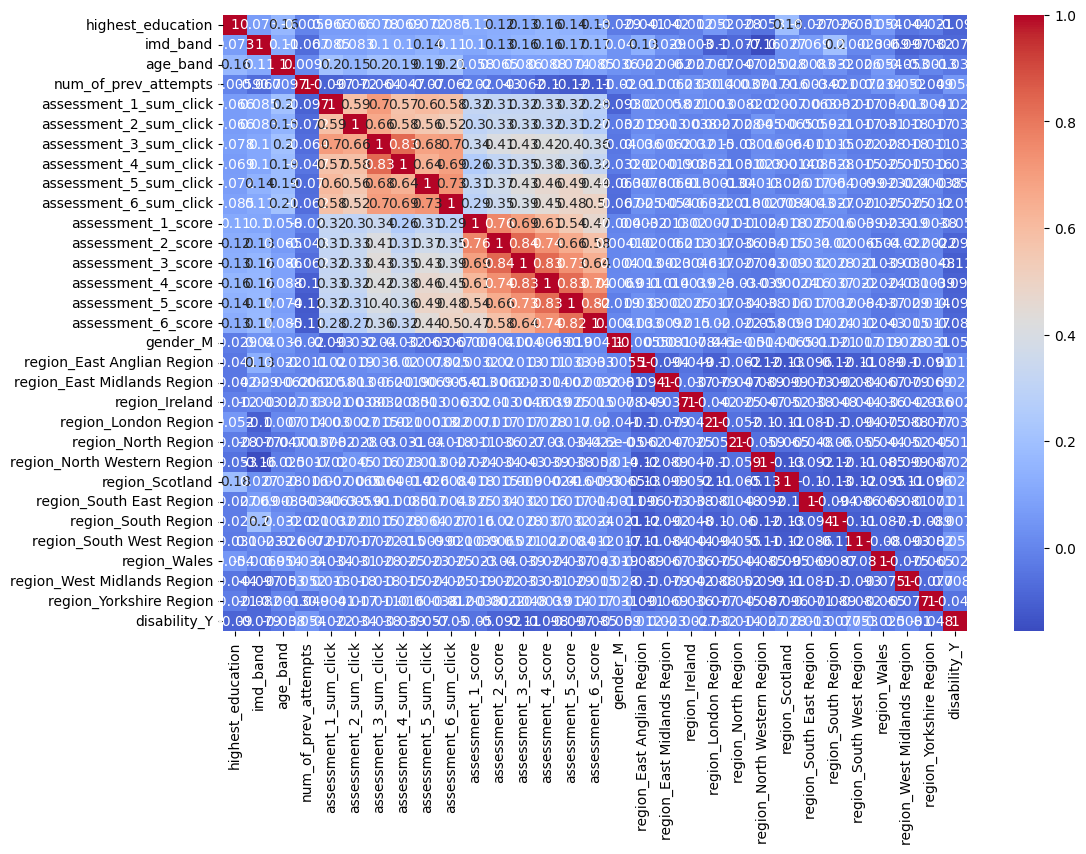

In [ ]:
# Correlation matrix to check for collinearity
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
#Split Test/Train Data, and Normalise

X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.2,  # Proportion of the data to be used for testing (20% here)
    random_state=42  # For reproducibility
)
# Print or check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Scale the assessment sum of clicks and number of attempts
scaler = MinMaxScaler()

# Replace -1 with NaN temporarily for fitting (as -1 is treated as missing)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_scale] = X_train_scaled[columns_to_scale].replace(-1, np.nan)
X_test_scaled[columns_to_scale] = X_test_scaled[columns_to_scale].replace(-1, np.nan)

# Fit the scaler on the data without the -1 values
scaler.fit(X_train_scaled[columns_to_scale])

#Tranform the data
X_train_scaled[columns_to_scale] = scaler.transform(X_train_scaled[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_scaled[columns_to_scale])

# Replace NaN with -1
X_train_scaled[columns_to_scale] = X_train_scaled[columns_to_scale].fillna(-1)
X_test_scaled[columns_to_scale] = X_test_scaled[columns_to_scale].fillna(-1)

# Print or check the shapes of the resulting datasets
print(f"X_train_scaled shape: {X_train.shape}")
print(f"X_test_scaled shape: {X_test.shape}")

display(y_train.info())
display(X_train_scaled.info())

X_train shape: (2518, 31)
X_test shape: (630, 31)
y_train shape: (2518,)
y_test shape: (630,)
X_train_scaled shape: (2518, 31)
X_test_scaled shape: (630, 31)
<class 'pandas.core.series.Series'>
Index: 2518 entries, 2308 to 860
Series name: final_result
Non-Null Count  Dtype
--------------  -----
2518 non-null   int64
dtypes: int64(1)
memory usage: 39.3 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 2308 to 860
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   highest_education            2518 non-null   float64
 1   imd_band                     2518 non-null   float64
 2   age_band                     2518 non-null   float64
 3   num_of_prev_attempts         2518 non-null   float64
 4   assessment_1_sum_click       2518 non-null   float64
 5   assessment_2_sum_click       2518 non-null   float64
 6   assessment_3_sum_click       2518 non-null   float64
 7   assessment_4_sum_click       2518 non-null   float64
 8   assessment_5_sum_click       2518 non-null   float64
 9   assessment_6_sum_click       2518 non-null   float64
 10  assessment_1_score           2518 non-null   float64
 11  assessment_2_score           2518 non-null   float64
 12  assessment_3_score           2518 non-null   float64
 13  assessment_4_score   

None

In [ ]:
# Train models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
}

# Evaluate models
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "F1 Score": f1
    })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision  F1 Score
0           Decision Tree  0.820635   0.821135  0.820535
1  Support Vector Machine  0.879365   0.881277  0.879245
2           Random Forest  0.877778   0.878673  0.877727
3     K-Nearest Neighbors  0.860317   0.863697  0.860042
4          Neural Network  0.869841   0.871711  0.869711


In [ ]:
# Helper function to tune models
def tune_model(model, param_grid, X_train_scaled, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


# Decision Tree
dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Support Vector Machine
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 1, 10],
}

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Neural Network
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000],
}


# Tune models
models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=42), dt_param_grid),
    'Support Vector Machine': (SVC(random_state=42), svc_param_grid),
    'Random Forest': (RandomForestClassifier(random_state=42), rf_param_grid),
    'K-Nearest Neighbors': (KNeighborsClassifier(), knn_param_grid),
    'Neural Network': (MLPClassifier(random_state=42), mlp_param_grid),
}

best_models = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    best_models[model_name] = tune_model(model, param_grid, X_train_scaled, y_train)

# Evaluate the best models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))

Tuning Decision Tree...
Best Parameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuning Support Vector Machine...
Best Parameters for SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Tuning Random Forest...
Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Tuning K-Nearest Neighbors...
Best Parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Tuning Neural Network...
Best Parameters for MLPClassifier: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'sgd'}

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       317
           1       0.87      0.81      0.84       313

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       6

In [ ]:
#Build an ensemble from the best three models
# Define individual models
svm = SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)  # Set probability=True for soft voting
random_forest = RandomForestClassifier(max_depth= 100, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 500, random_state=42)
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10, weights= 'distance')

# Create the ensemble model using VotingClassifier (soft voting)
ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('rf', random_forest),
    ('knn', knn)
], voting='soft')

# Train the ensemble model
ensemble.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test_scaled)

# Evaluate the ensemble model's Performance
y_pred = ensemble.predict(X_test_scaled)
print(f"\nThe Ensemble's Performance:")
print(classification_report(y_test, y_pred))


The Ensemble's Performance:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       317
           1       0.86      0.92      0.89       313

    accuracy                           0.89       630
   macro avg       0.89      0.89      0.89       630
weighted avg       0.89      0.89      0.89       630

